In [1]:
from wmf import wmf 
import numpy as np
import pylab as pl
import pandas as pd
import pickle
import datetime
from datetime import timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings('ignore')
import scipy as scp
import os
import aforos as af
from IPython.display import IFrame
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xlsxwriter
import codecs
from multiprocessing import Pool
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import matplotlib.patches as patche
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
mainfolder = 'Salidas_Redrio' # nombre de la carpeta principal
hora_inicial = '06:00' # hora de inicio de todas las campañas
hora_final = '18:00' # hora de finalización de todas las campañas
fechas = pd.to_datetime(['2017-02-22','2017-03-08','2017-03-09','2017-04-26','2017-06-21','2017-06-22'])

In [3]:
def aforo(codigo,DEM='dem_amva60',DIR='dir_amva60',aforo=1):
    '''runs aforos module
    Parameters
    ----------
    codigo: id in dbase
    salida: campain folder name
    DEM : dem name
    DIR : dir name
    aforo : flow measurement number or id
    -------
    Returns
        ------
        out: self
        sets module aforos up 
        '''
    self = af.aforos(codigo,aforo=int(aforo),
                    nombre = df_informacion.loc[codigo,'FolderName'])
    self.ruta_dem = '/media/nicolas/Home/nicolas/01_SIATA/raster/%s.tif'%DEM
    self.ruta_dir = '/media/nicolas/Home/nicolas/01_SIATA/raster/%s.tif'%DIR
    self.longitud = float(df_informacion.loc[codigo,'Longitud'])
    self.latitud = float(df_informacion.loc[codigo,'Latitud'])
    self.name = df_informacion.loc[codigo,'Nombre']
    self.municipio = df_informacion.loc[codigo,'Municipio']
    self.direccion = df_informacion.loc[codigo,'Direccion']
    self.barrio = df_informacion.loc[codigo,'Barrio']
    self.subcuenca = df_informacion.loc[codigo,'Subcuenca']
    return self

def runbyid(dfe_id):
    self = aforo(int(dfe.loc[dfe_id,'id_estacion_asociada']),aforo=dfe.loc[dfe_id,'aforo'])
    self.fecha = pd.to_datetime(dfe.loc[dfe_id,'fecha'])
    self.date = self.fecha.strftime('%Y-%m-%d %H:%M')
    return self

In [4]:
hora_inicial = '06:00'
hora_final = '18:00'
df_informacion = pd.read_csv('../information/info_redrio.csv',index_col=0)
#dfe = pd.read_csv('../information/salidas_21y22_junio.csv',index_col=0)
texto = ['% ----------------------------------------------',
         '% ---------------------TEXTO AQUÍ---------------',
         '% ----------------------------------------------']


# chapter "descripción y morfometría"

# Salida 22 de febrero

In [5]:
fecha = pd.to_datetime('2017-04-26')
dfe = pd.read_csv('../information/20170426_dfe.csv',index_col=0)
nombre_salida = u'Campaña 26 de Abril'

# lluvia
para la lluvia se usa la estación puente gabino

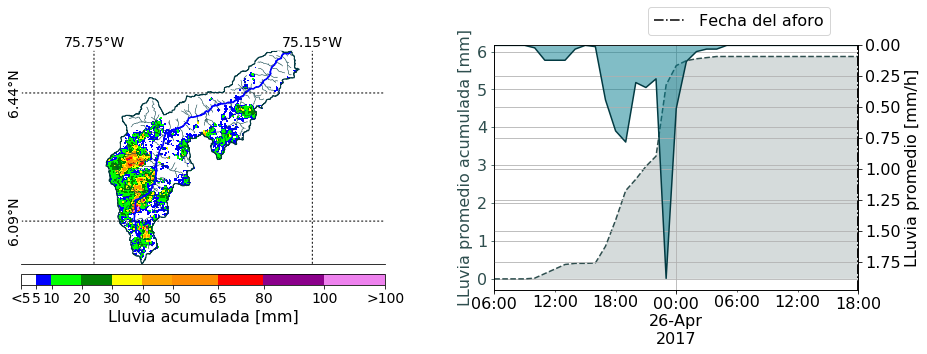

In [6]:
fecha = pd.to_datetime('2017-04-26')
self = aforo(1061)
self.fecha = fecha+datetime.timedelta(hours=18)
#self.get_rain()
self.simubasin(rute=True,show=False)
rain = self.plot_lluvia_aforo(ax2color='darkslategrey',
                  fecha=self.fecha.strftime('%Y-%m-%d')+' 18:00',
                  ruta='%s/%s_rain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),
                  formato='png')

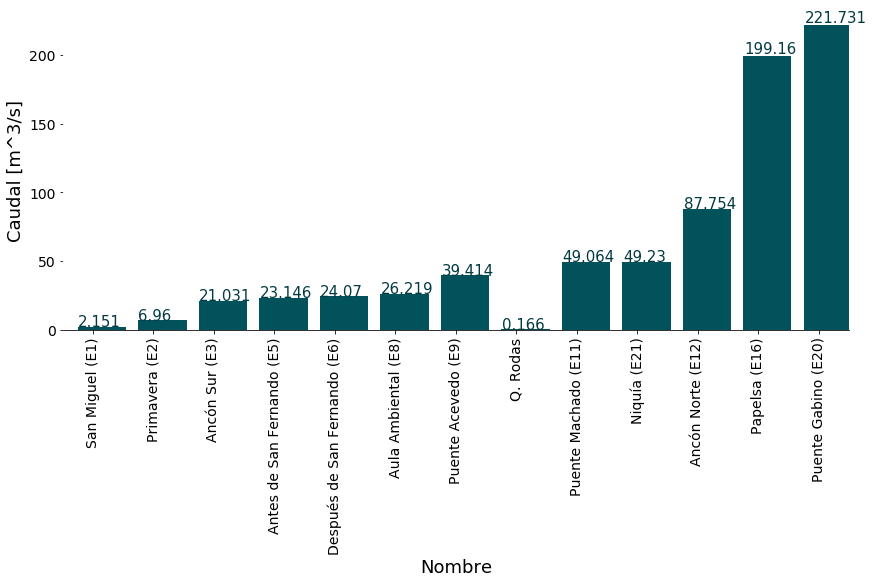

In [20]:
resumen = df_informacion.loc[dfe['id_estacion_asociada'].values].set_index('Nombre')
resumen['caudal_medio']= dfe['caudal_medio'].values
self.plot_resumen_flow(resumen['caudal_medio'],'%s/%s_flux.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')))

Colombia
Antioquia


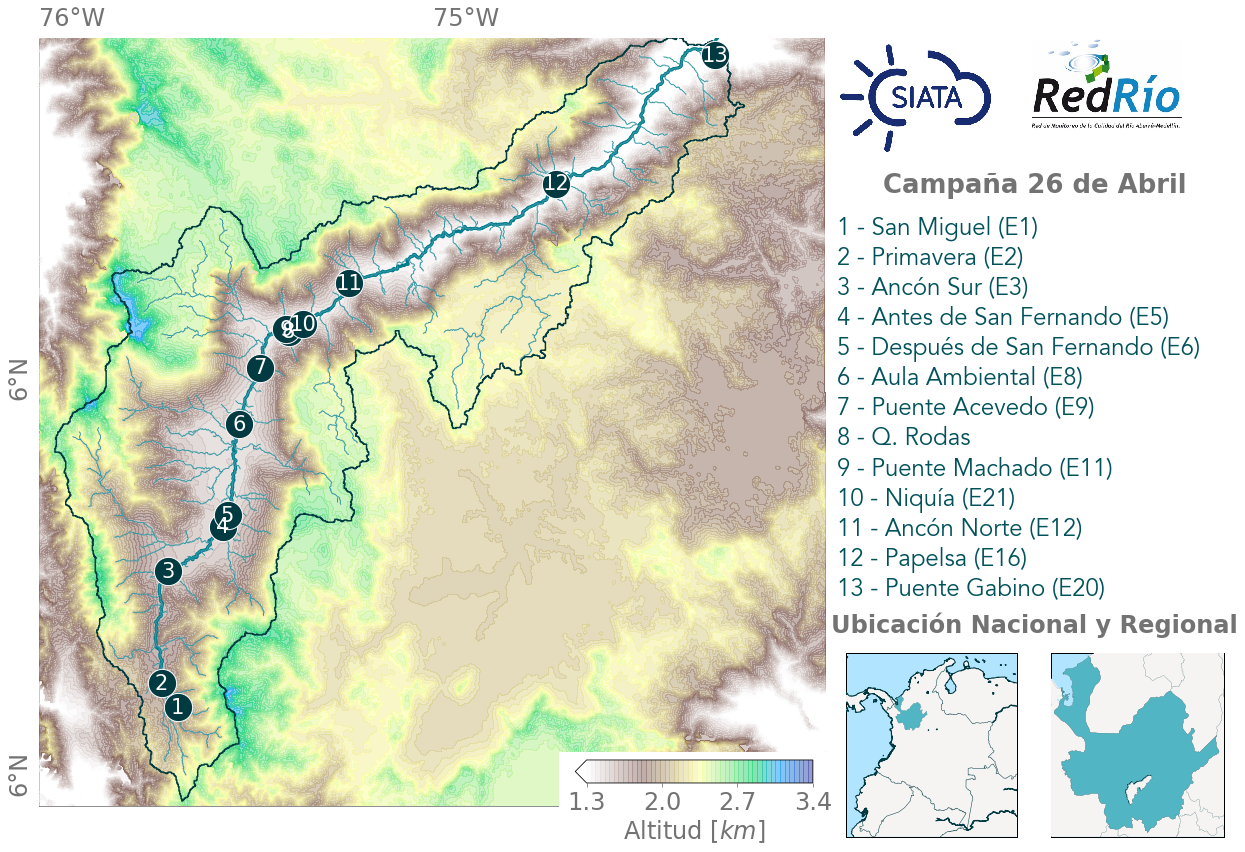

In [21]:
point = df_informacion.loc[dfe['id_estacion_asociada'].values].sort_values(by='Latitud')
self.Plot_Mapa2(add_scatter=[point['Longitud'].values,point['Latitud'].values],\
                title =nombre_salida,Logo='SIATA2.png',\
                Drainage='/media/nicolas/maso/Mario/shapes/nets/Puente_Gabino_1061/Puente_Gabino_1061',\
                add_stations=map(lambda x:x.decode('utf-8'),point['Nombre'].values),\
                georef=[6.556,5.975,-75.725,-75.1255],clim=[1300,3400],fontsize=24,\
                Basin='/media/nicolas/maso/Mario/shapes/basins/Puente_Gabino_1061/Puente_Gabino_1061')

self.m.readshapefile('/media/nicolas/maso/Mario/shapes/streams/169/169','drenaje',
                     color=self.colores_siata[-3],
                     linewidth=3.0,zorder=5)

plt.savefig('%s/%s_map_campain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),format='png',bbox_inches='tight')


# Tabla resultados

In [8]:
nombre_salida = 'Campaña 26 de Abril'
caption = 'Parámetros hidráulicos %s'%nombre_salida
columns = ['Caudal medio','Velocidad media','Área','Perímetro','Altura media','Rádio hidráulico']
cellwidth = [30]+6*[70/6]
df_latex = dfe[['caudal_medio','velocidad_media','area_total','perimetro','altura_media','radio_hidraulico']]
df_latex.index = df_informacion.loc[dfe['id_estacion_asociada'].values]['Nombre'].values
tabla=self.latex_table_from_df(df_latex,caption,'tab:%s'%fecha.strftime('%Y%m%d'),columns,cellwidth,width=5.6)

# curva de calibración gabino

In [9]:
df_alturas = pd.read_csv('../information/20170426_heights.csv',index_col=0)
df_alturas.columns = np.array(df_alturas.columns,int)

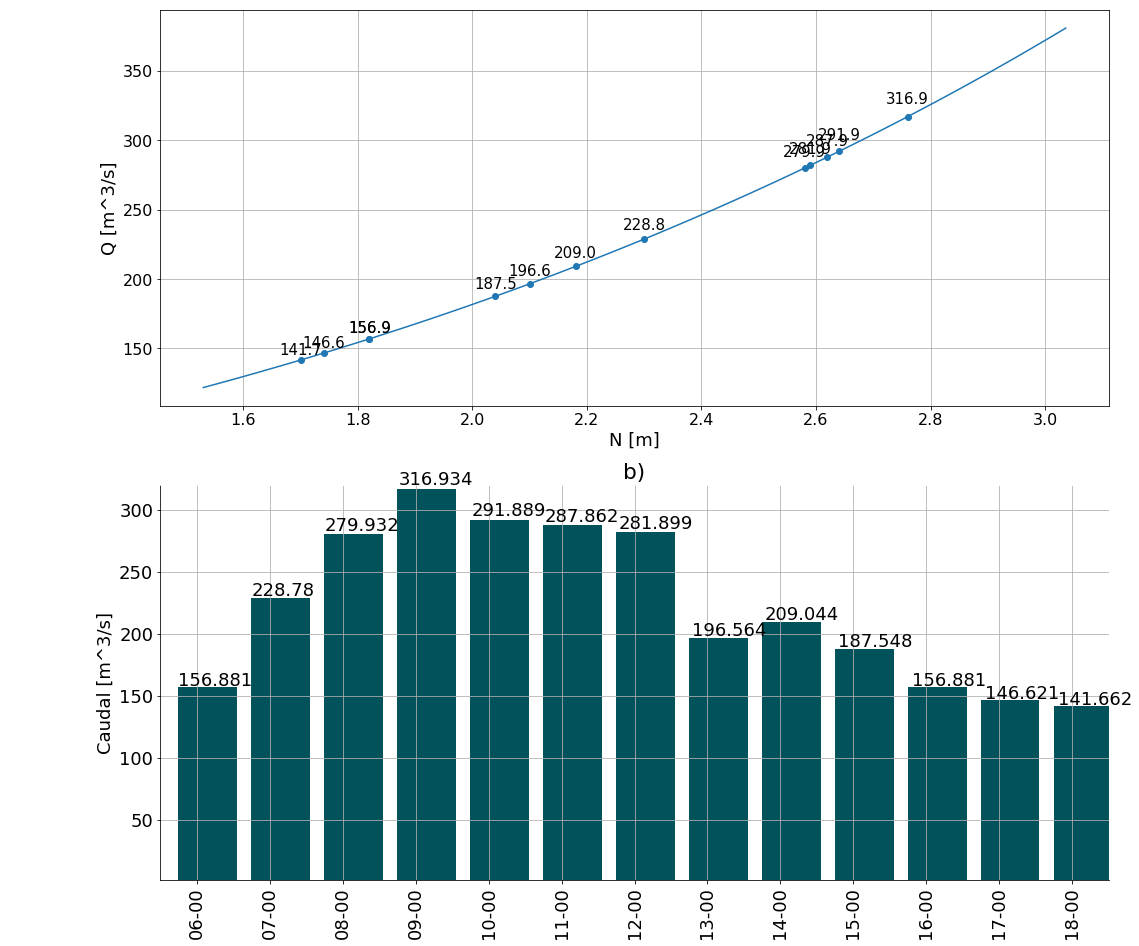

In [28]:
N = np.array(df_alturas[df_alturas.columns[-1]].values,float)
ruta = '%s/curva_gabino.png'%fecha.strftime('%Y%m%d') 
ax1,ax2 = self.plot_curva_gabino(N,ruta=ruta)
#ax1.set_xlim(1.5,3.0)

In [18]:
dfe.loc[12,'caudal_medio'] = np.mean(self.curva_gabino(N))
dfe.to_csv('../information/20170426_dfe.csv')

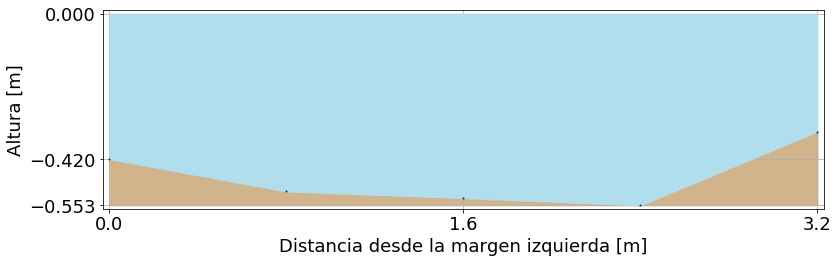

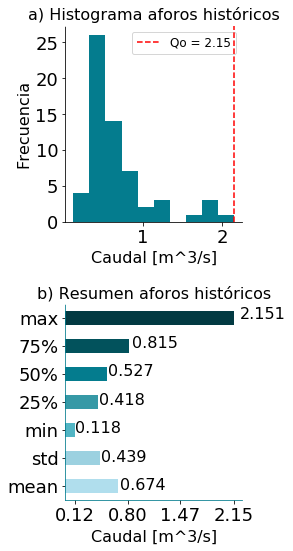

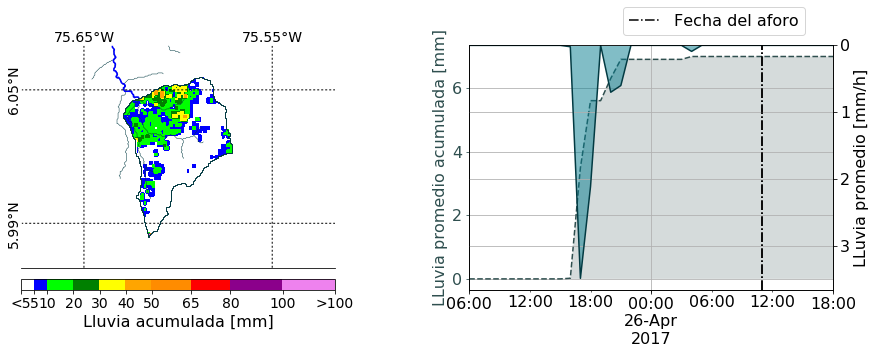

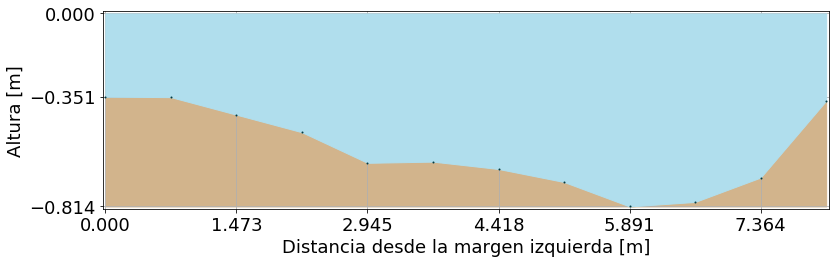

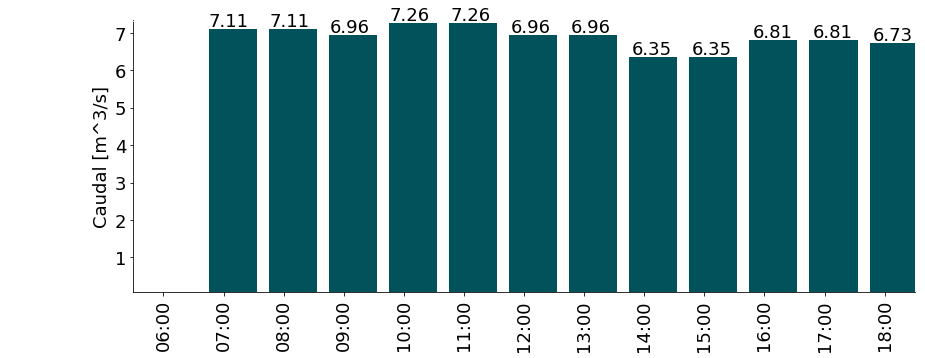

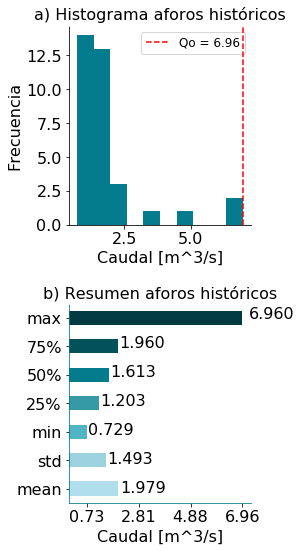

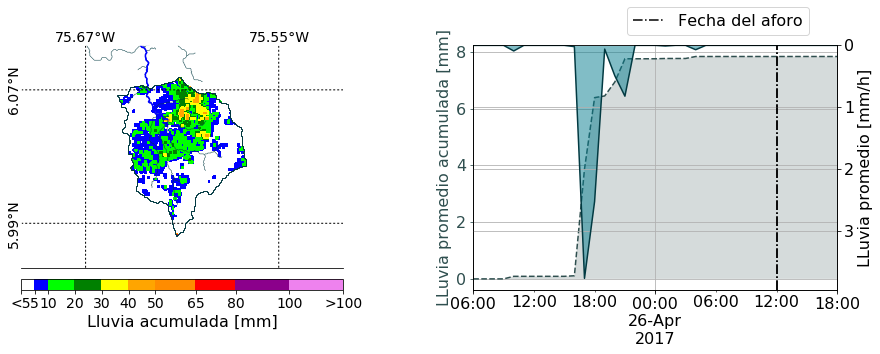

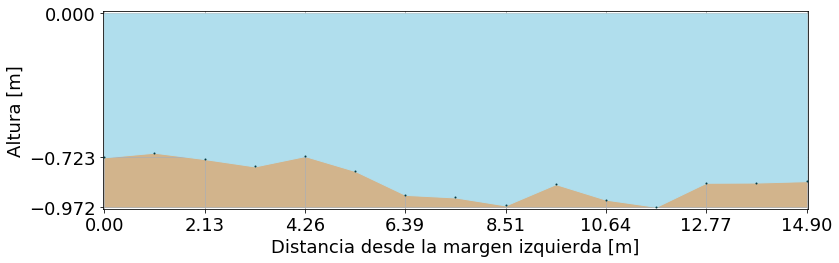

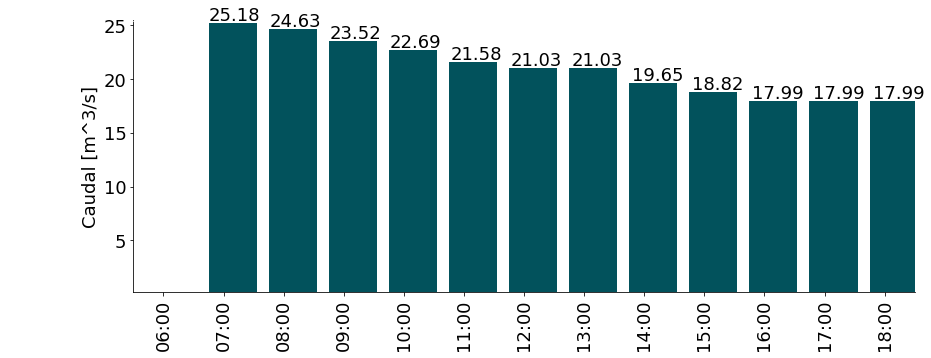

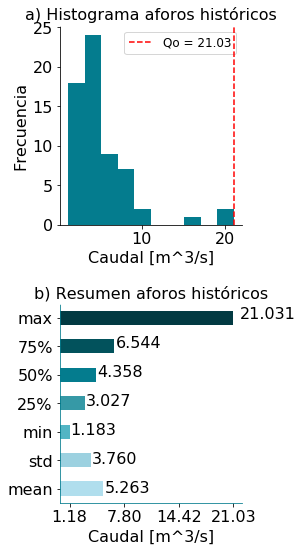

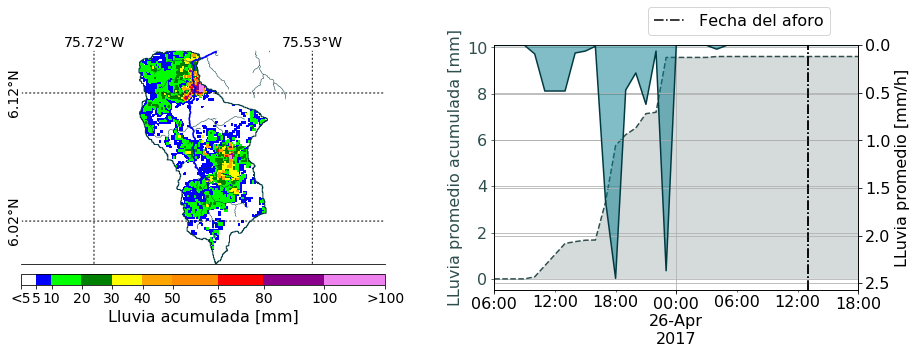

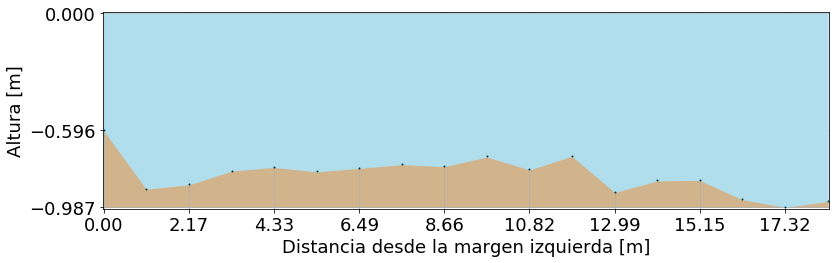

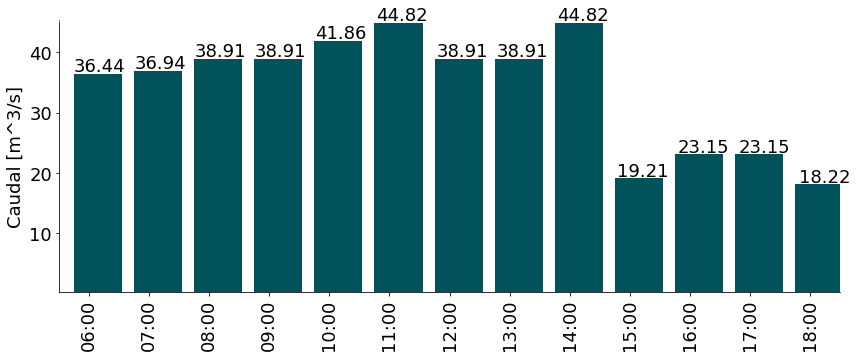

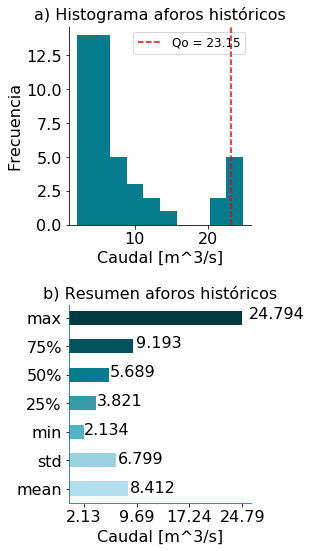

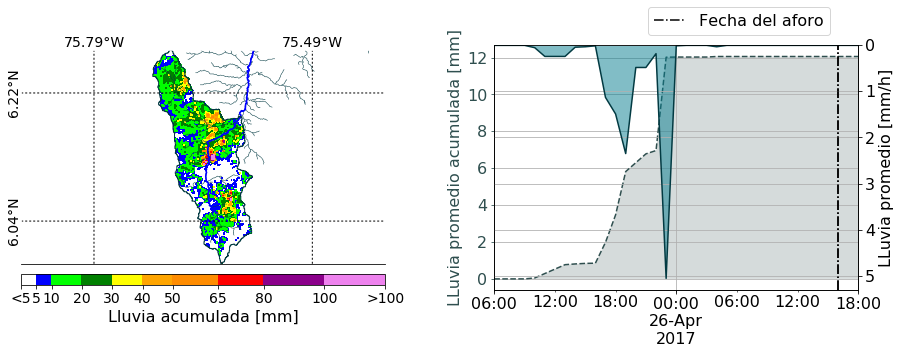

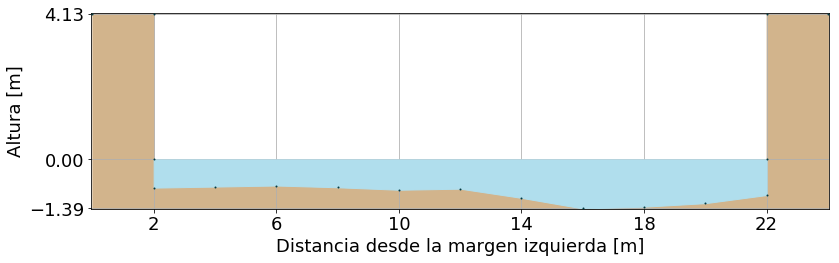

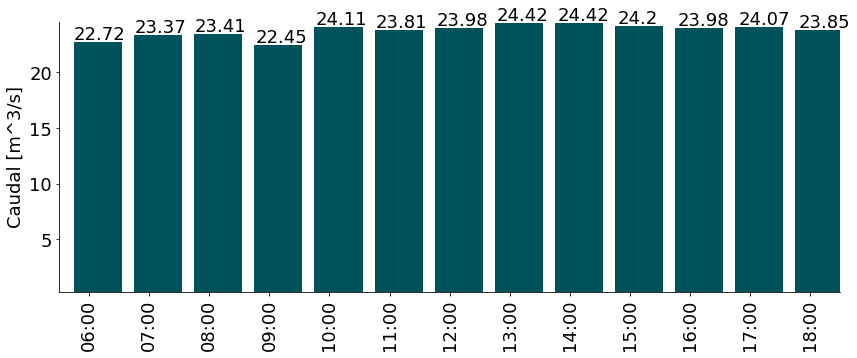

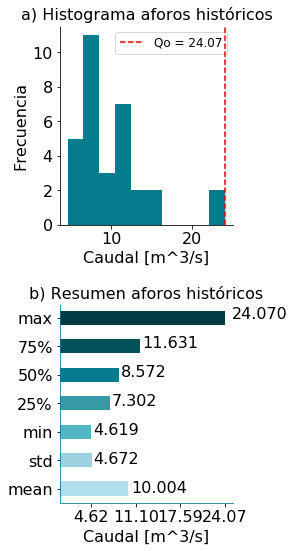

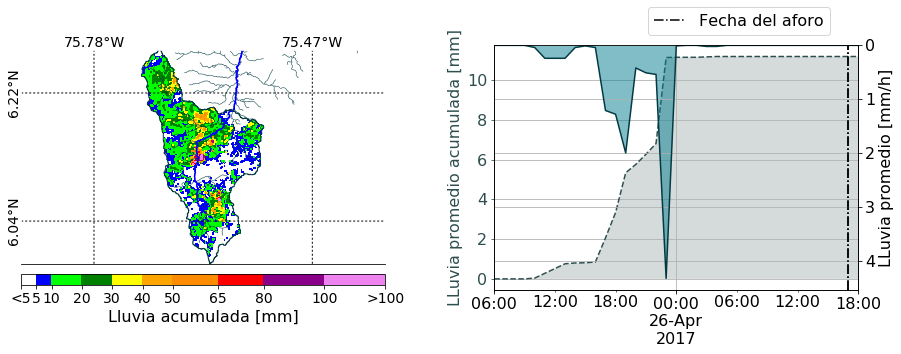

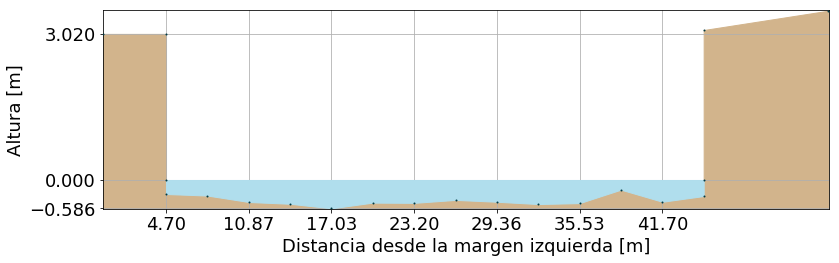

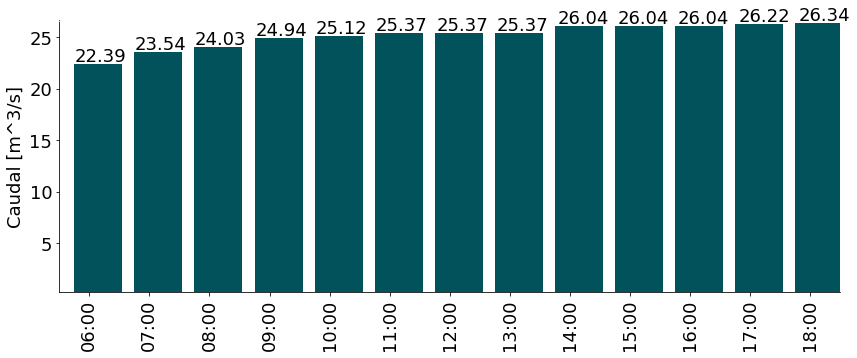

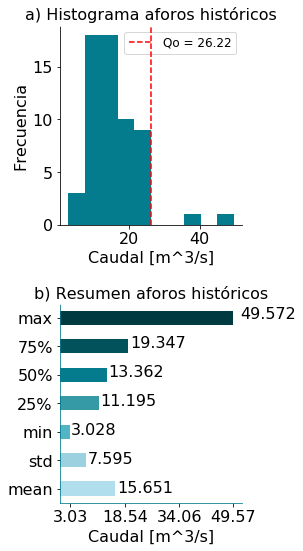

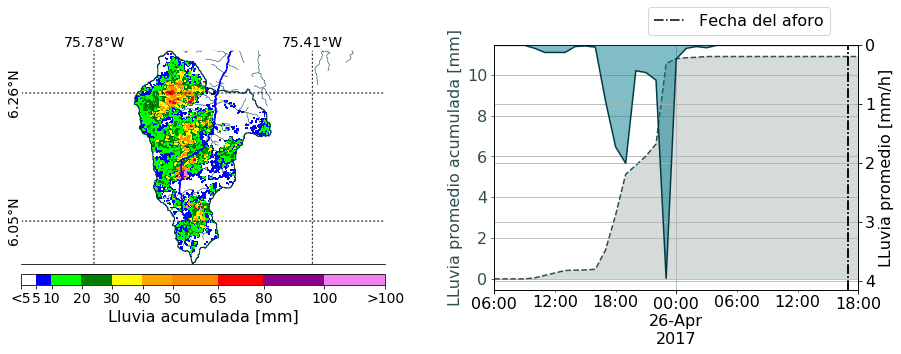

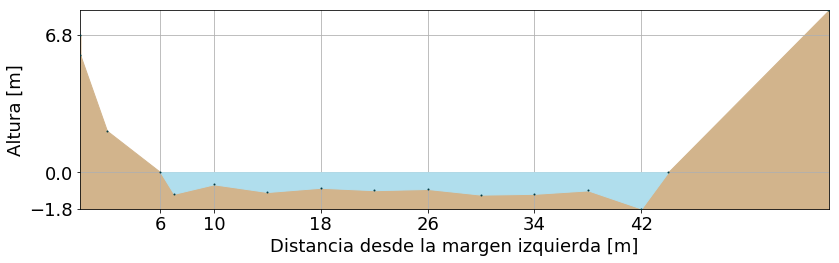

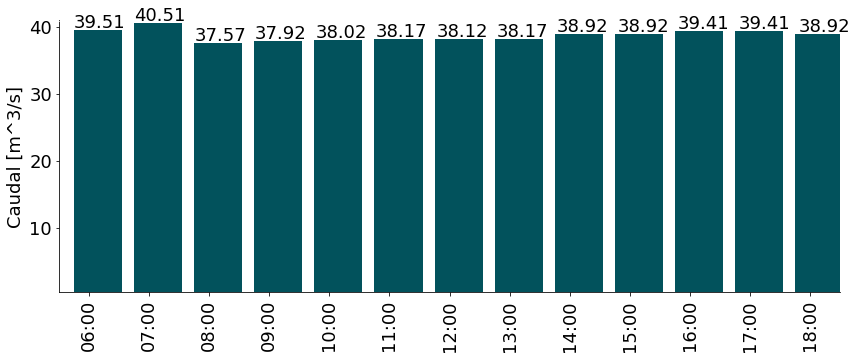

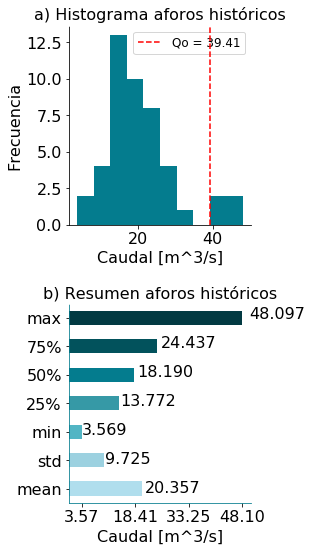

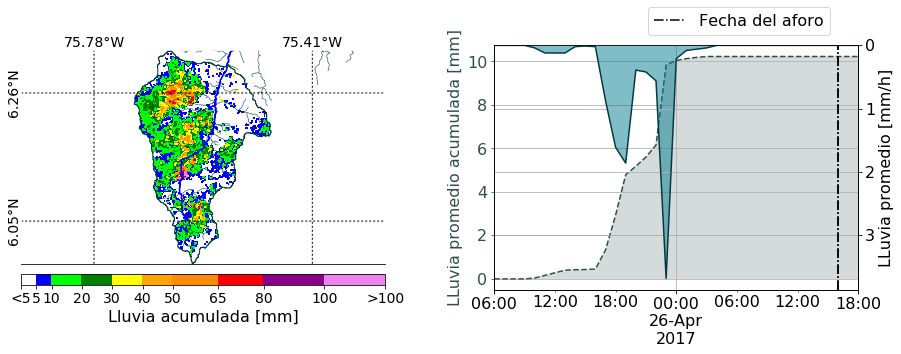

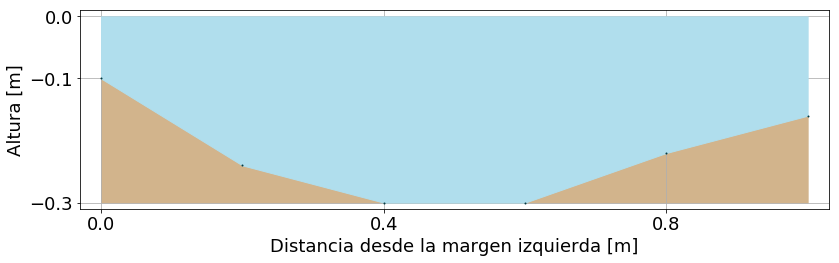

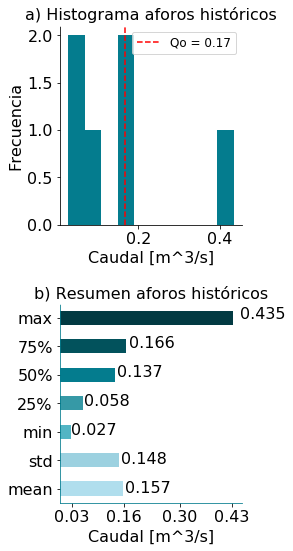

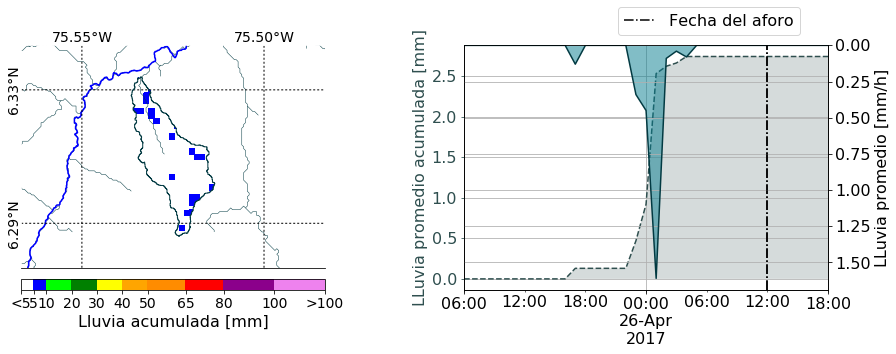

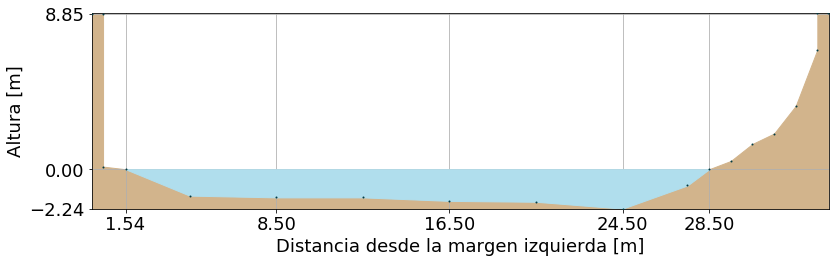

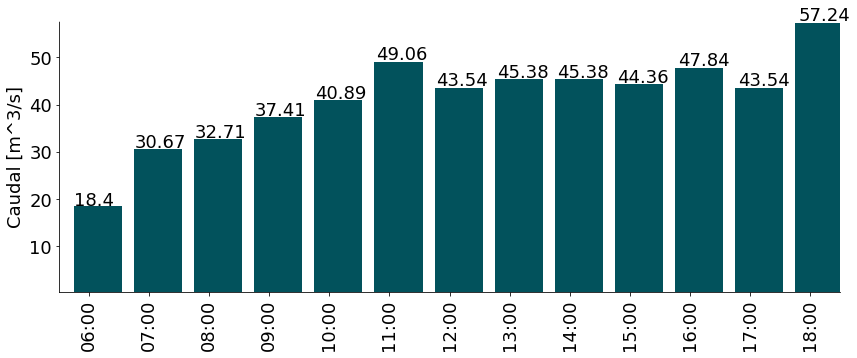

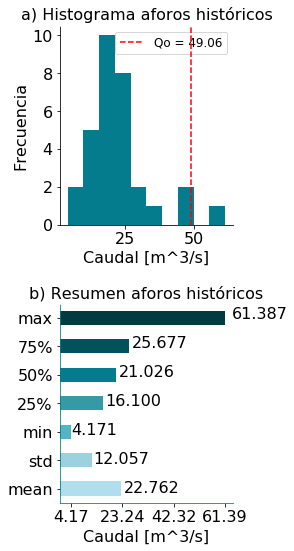

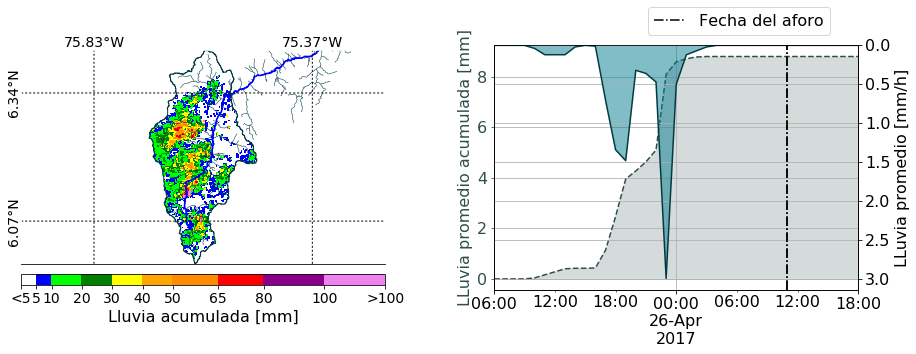

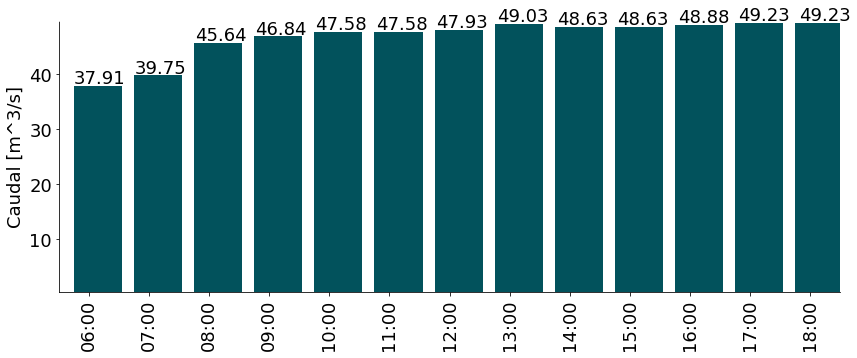

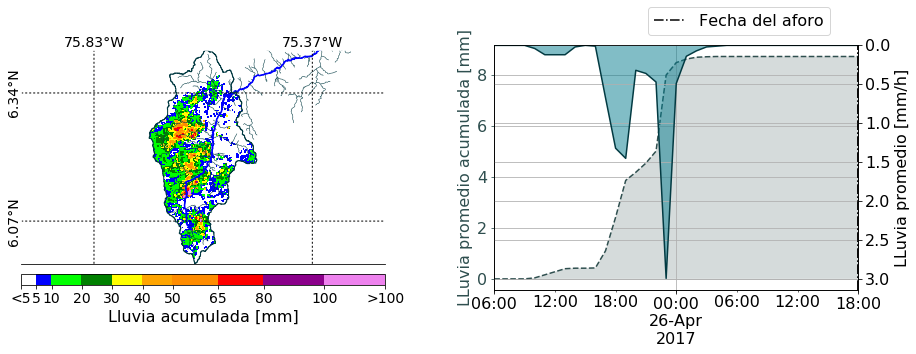

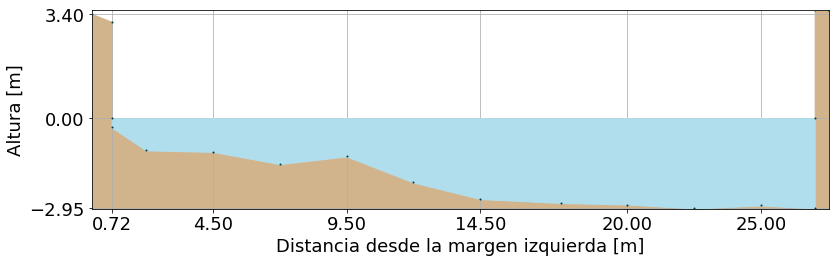

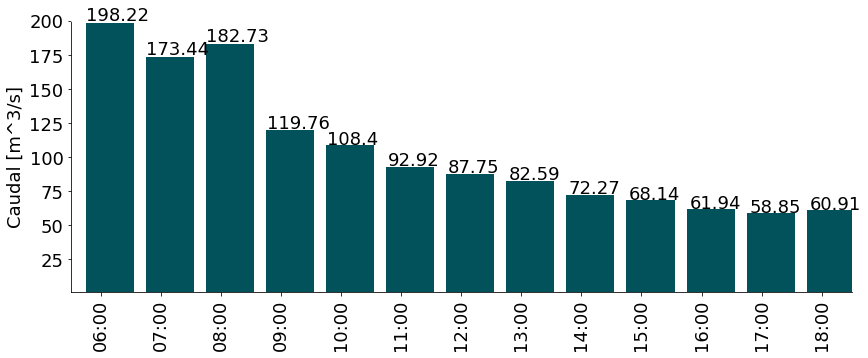

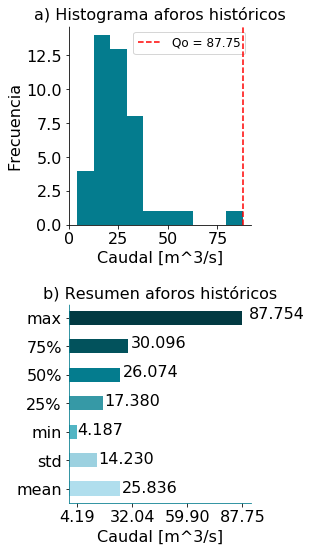

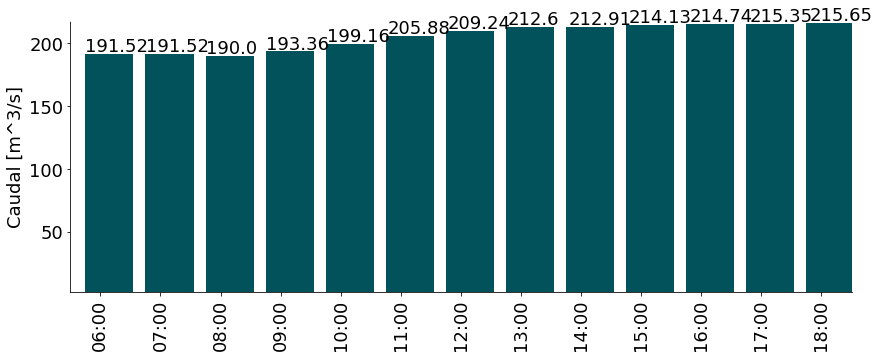

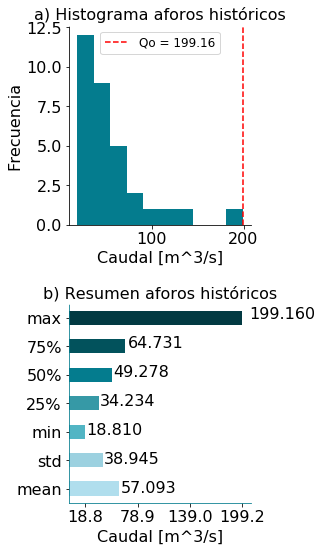

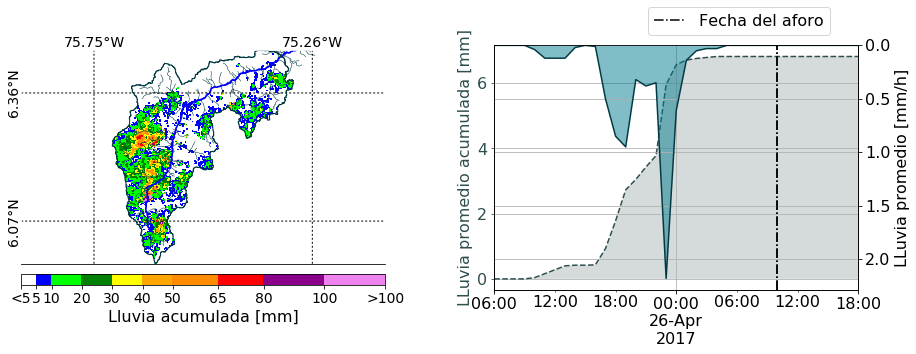

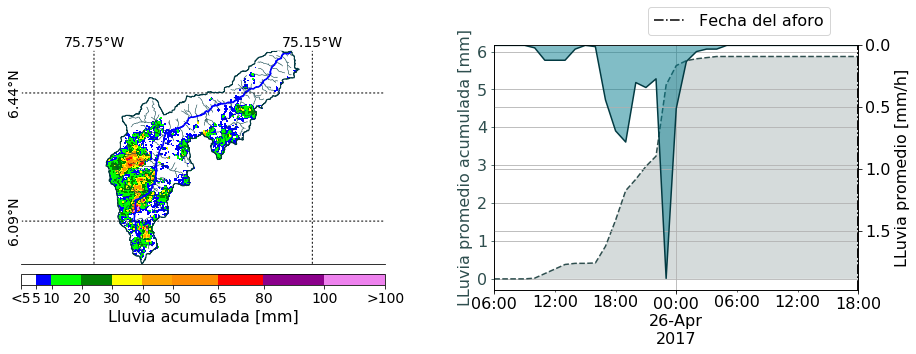

In [12]:
def latex_hidrologia(self,caudal,ruta_fig,label):
        difiere = round(((caudal/self.caudales_historicos.median().values[0])-1.0)*100,3)
        plot_figure = []
        plot_figure.append('\\begin{multicols}{2}')
        plot_figure.append('La figura \\ref{%s} está construida con datos de aforos históricos realizado sobre la misma sección, el recuadro superior es un histograma de frecuencias, mientras que el recuadro inferior es un resumen con los estadísticos más importantes. En total se cuenta con %d aforos, el caudal observado difiere de la mediana histórica %.3f $[m^3/s]$ en un %.2f porciento.'%(label,self.caudales_historicos.index.size,self.caudales_historicos.median().values[0],difiere))                           
        plot_figure.append('{\\centering')
        plot_figure.append('\\includegraphics[width=5.0cm]{{%s}}'%(ruta_fig))
        plot_figure.append('\\captionof{figure}{\small Información de Aforos históricos %s}'%self.name)
        plot_figure.append('\\label{%s}'%label)
        plot_figure.append('}')
        plot_figure.append('\\end{multicols}')
        return plot_figure


resultados = ['']
resultados.append('\\section{%s}'%nombre_salida)
    #--plot map_campain
resultados+=self.latex_figure(17,'%s/%s_map_campain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),'Mapa %s'%nombre_salida,'fig:%smapcamp'%(fecha.strftime('%Y%m%d')))
resultados+=self.latex_figure(17,'%s/%s_rain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),'Lluvia %s'%nombre_salida,'fig:%srain'%(fecha.strftime('%Y%m%d')))
resultados+=self.latex_figure(17,'%s/%s_flux.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),'Resultados %s'%nombre_salida,'fig:%sflux'%(fecha.strftime('%Y%m%d')))
resultados+=tabla

df = pd.DataFrame.copy(dfe)
for i in df.index:
    self = runbyid(i)
    if df.loc[i,'aforo_especial']==1:
        self.dispositivo = '-999'
        resultados+= ['\\subsection{%s}\\'%self.name]
        if int(df.loc[i,'id_estacion_asociada'])==1061:
            resultados+= self.latex_figure(17,'%s/curva_gabino.png'%(fecha.strftime('%Y%m%d')),
                                  'Caudales estimados a partir de curva de calibración',
                                  'fig:%scurva'%(fecha.strftime('%Y%m%d')))
            resultados += ['\\clearpage'] 
    else:
        self.get_resultados_mysql()
        self.dispositivo = self.dfr.loc['dispositivo','Resultado']
        self.plot_section(wet=self.verticales,
                    lev=self.levantamiento,
                    figsize=(12,4),
                    fontsize=18,
                    sepx=0.03,
                    sepy=0.01,
                    filepath='%s/%s_section_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre))
        resultados += self.latex_results_table('tab:%s_hidroparam_%s'%(fecha.strftime('%Y%m%d'),self.nombre))
        lbl = '\\ref{tab:%s_hidroparam_%s}'%(fecha.strftime('%Y%m%d'),self.nombre)
        resultados+=['El aforo se realizó en la fecha %s, el caudal obtenido fue de %s $[m^3/s]$. La sección aforada tiene un ancho superficial que mide %s [m], la altura promedio de la lámina de agua es de %s [m], la altura máxima se ubica a %s [m] de la margen izquierda del canal con un valor de %s [m]. Para el cálculo de velocidades se utilizó el dispositivo %s, el valor medio de velocidad obtenido fue de %s $[m/s]$, y el máximo de %s $[m/s]$. La sumatoria de áreas en todas las verticales deja un área total de %s $[m^2]$. Los demás parámetros se pueden observar en la tabla %s.'%(self.fecha.strftime('%Y-%m-%d %H:%M'),round(self.dfr.loc['caudal_medio','Resultado'],3),round(self.dfr.loc['ancho_superficial','Resultado'],3),round(self.dfr.loc['altura_media','Resultado'],3),
        round(abs(self.verticales.set_index('x')['y'].argmin()),3),round(abs(self.verticales['y'].min()),3),self.dfr.loc['dispositivo','Resultado'],
        round(self.dfr.loc['velocidad_media','Resultado']),round(self.verticales['velocidad04'].max(),3),round(self.dfr.loc['area_total','Resultado'],3),lbl)]
        resultados += self.latex_section('%s/%s_section_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                       'fig:%s_section_%s'%(fecha.strftime('%Y%m%d'),self.nombre))+texto
        resultados+=['\\clearpage']
        
    try:
        if int(df.loc[i,'id_estacion_asociada'])==1061:
            dfe.loc[i,'alturas'] = 0
        else:
            caudal = dfe.loc[i,'caudal_medio']
            df_alturas = pd.read_csv('../information/%s_heights.csv'%fecha.strftime('%Y%m%d'),index_col=0)
            df_alturas.columns = np.array(df_alturas.columns,int)
            caudales = self.get_flow_from_heights(caudal,self.codigo,df_alturas)
            self.plot_bars(caudales,rute='%s/%s_heights_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),decimales=2)

            resultados+= self.latex_figure(17,'%s/%s_heights_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                                      'Caudales estimados  %s %s'%(nombre_salida,self.name),
                                      'fig:%sheights_%s'%(fecha.strftime('%Y%m%d'),self.nombre))
            resultados+=['Partiendo del caudal estimado mediante el aforo y de datos de nivel de la lámina de agua medidos en campo durante la campaña, se estimaron los caudales horarios desde las 6:00 hasta las 18:00, el caudal promedio durante la campaña fue %.3f $[m^3/s]$. Los resultados se encuentran en la Figura \\ref{%s}.'%(caudales.mean(),'fig:%sheights_%s'%(fecha.strftime('%Y%m%d'),self.nombre))]
            dfe.loc[i,'alturas'] = 1
    except:
        dfe.loc[i,'alturas'] = 0
    try:
        self.plot_compara_historicos('%s/%s_hist_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre))
        resultados+=latex_hidrologia(self,dfe.loc[i,'caudal_medio'],'%s/%s_hist_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                                    'fig:%shist%s'%(fecha.strftime('%Y%m%d'),self.nombre))
        dfe.loc[i,'historico'] = 1
    except:
        dfe.loc[i,'historico'] = 0
    
    if df_informacion.loc[self.codigo,'morfo']==1.0:
        self.simubasin(rute=True,show=False)
        rain = self.plot_lluvia_aforo(ax2color='darkslategrey',
                      fecha=self.fecha.strftime('%Y-%m-%d')+' 18:00',
                      ruta='%s/%s_rain_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                      formato='png')
        
        resultados+= self.latex_figure(17,'%s/%s_rain_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                                  'Lluvia %s %s'%(nombre_salida,self.name),
                                  'fig:%srain_%s'%(fecha.strftime('%Y%m%d'),self.nombre))
        if max(self.accumulated_rain)>1.0:
            resultados+=['La mayor intensidad promedio de lluvia fue registrada en la cuenca en la fecha %s, con un valor de %.3f $[mm/h]$.'%(rain.argmax().strftime('%Y-%m-%d %H:%M'),rain.max())]
            resultados+=['La distribución de la lluvia en la cuenca se puede observar en el recuadro izquierdo de la Figura \\ref{%s}, donde se reportó un valor máximo de %.3f $[mm]$.'%('fig:%srain_%s'%(fecha.strftime('%Y%m%d'),self.nombre),max(self.accumulated_rain))]

    try:
        self.dfr = self.dfr.fillna(-999)
        self.verticales = self.verticales.fillna(-999)
        self.levantamiento = self.levantamiento.fillna(-999)
        self.data_to_excel('%s_data/%s_%s.xlsx'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre))
        dfe.loc[i,'datatoexcel']=1
    except:
        dfe.loc[i,'datatoexcel']=0
np.savetxt('%s.tex'%fecha.strftime('%Y%m%d'),resultados, fmt='%s')

In [21]:
nombre_info = 'borrar26'
includes = ['\\include{Portada}','\\setlength{\\headsep}{40pt}',\
            '\\tableofcontents',\
            '\\listoffigures',\
            '\\listoftables',\
            '\\include{introduccion}',\
            '\\chapter{Información de las estaciones aforadas}']+texto+\
            ['\\clearpage']

self.informe(includes+['\\include{20170426}'],\
             header_filepath='figuras/header.png',\
             header_text='Informe salidas modelación',\
             logo_filepath='figuras/logo.png',\
             cover_filepath = 'figuras/cover.png',\
             foot_filepath = 'figuras/foot.png',\
             nombre_info=nombre_info)

#self.informe(includes,ruta = '../figuras',nombre_info=nombre_info)
IFrame('%s_optimizado.pdf'%nombre_info, width=1000, height=1000)